In [9]:
import numpy as np 
import os 
import main 
import cv2
import random 
import matplotlib.pyplot as plt 

In [2]:
def read_file_path_list(main_dir):
    dir_list = os.listdir(main_dir)

    dir_list = [dir for dir in dir_list if os.path.isdir(os.path.join(main_dir,dir))]

    file_path_list = []

    for dir_name in dir_list:
        file_list = os.listdir(os.path.join(main_dir,dir_name))
        for file in file_list:
            file_path_list.append(os.path.join(main_dir, dir_name, file))
    
    return file_path_list

def select_pills(total_pill_list, current_pill_index, num_others=3):
    indices = list(range(len(total_pill_list)))
    indices.remove(current_pill_index)
    selected_index = random.sample(indices, num_others)
    selected_index = [current_pill_index] + selected_index
    selected_pill_list = [total_pill_list[index] for index in selected_index ]
    return selected_pill_list   

def get_pill_pose(img): 
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 7)
    gray = cv2.bilateralFilter(gray, 8, 31, 3)
    edge = cv2.Canny(gray, 10, 200 )           
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(31,31))
    edge = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)

    # cv2.imshow('edge', edge)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    x,y,w,h  = cv2.boundingRect(edge)

    return x,y,w,h

In [3]:
main_dir = 'C:\\Users\\joo\\Desktop\\project\\datasets\\etri'

total_pill_list = read_file_path_list(main_dir=main_dir)

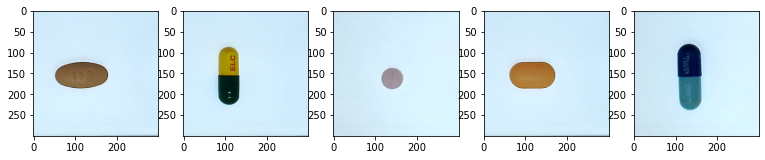

In [4]:
num_pill = 4 + 1
selected_pills = select_pills(total_pill_list, 100 ,num_pill - 1)
_, ax = plt.subplots(1,num_pill, figsize=(13,13))
for i in range(num_pill):
    ax[i].imshow(cv2.imread(selected_pills[i])[:,:,::-1])

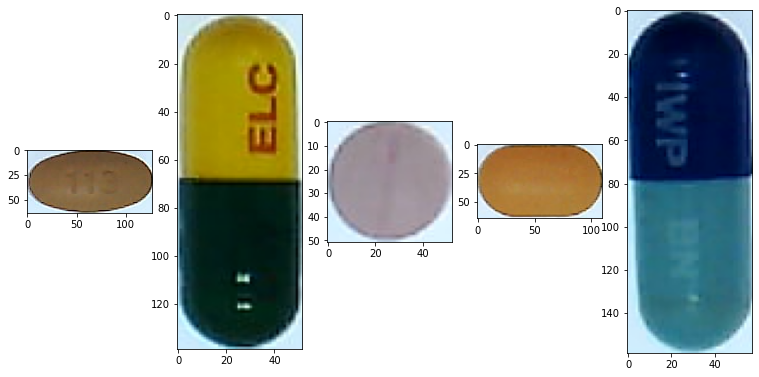

In [5]:
maring = 30
selected_pill_rects = []
_, ax = plt.subplots(1,num_pill, figsize=(13,13))

crop_pills = []
for i, pill in enumerate(selected_pills):
    img = cv2.imread(pill)
    img = img[maring:300 - maring,maring:300-maring,:]
    x,y ,w, h = get_pill_pose(img)
    selected_pill_rects.append([x, y, w, h])
    crop_pills.append(img[y:y+h, x:x+w, :])
    ax[i].imshow(crop_pills[i][:,:,::-1])
plt.show()


In [40]:
while True:
    try:
        out_rects = main.get_random_rects2(selected_pill_rects)
        break
    except IndexError:
        print(IndexError)
        pass
        
back = np.zeros((300, 300, 3), dtype='uint8')
back[:,:,:] = crop_pills[0][5,5]

for (out_rect, crop_pill) in zip(out_rects, crop_pills):
    x, y, w, h = out_rect[0], out_rect[1],out_rect[2], out_rect[3]
    w = min(300, x+w) - x
    h = min(300, y+h) - y
    back[y:y+h, x:x+w,:] = crop_pill[0:h, 0:w,:]

cv2.imshow('back',back)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'IndexError'>
<class 'IndexError'>
